# Clase 9: Inferencia Estadística V
Para abrirlo con colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase9_InferenciaEstadisticaV.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q

## Analísis de Varianza (ANOVA)

El análisis de varianza involucra la partición de la varianza en los datos, y atribuir la varianza observada a distintos causas o factores.

Este se usa para evaluar cuando el promedio de una variable respuesta es diferente por los distintos niveles de una variable categórica.

En este caso la hipótesis nula y alternativa se definen como:

- $H_0$: El promedio de una variable es el mismo en todas las categorías
- $H_a$: Al menos un promedio es diferente a otras categorías.

## Caso de Estudio: PlantGrowth

Para entender el uso de ANOVA se utilizarán los datos para el crecimiento hormonal de plantas.


In [ ]:
import rdatasets
dataset_plant = rdatasets.data('PlantGrowth') # utilizamos el paquete rdatasets para obtener bases de datos de R
dataset_plant.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [ ]:
dataset_plant['group'].value_counts() # nos permite identificar la cantidad de datos por grupo

,count
group,
ctrl,10
trt1,10
trt2,10


In [ ]:
# estimadores puntuales
dataset_plant.groupby('group').agg(
    {'weight': ['mean', 'std', 'var']}
    )['weight']

,mean,std,var
group,,,
ctrl,5.032,0.583091,0.339996
trt1,4.661,0.793676,0.629921
trt2,5.526,0.442573,0.195871


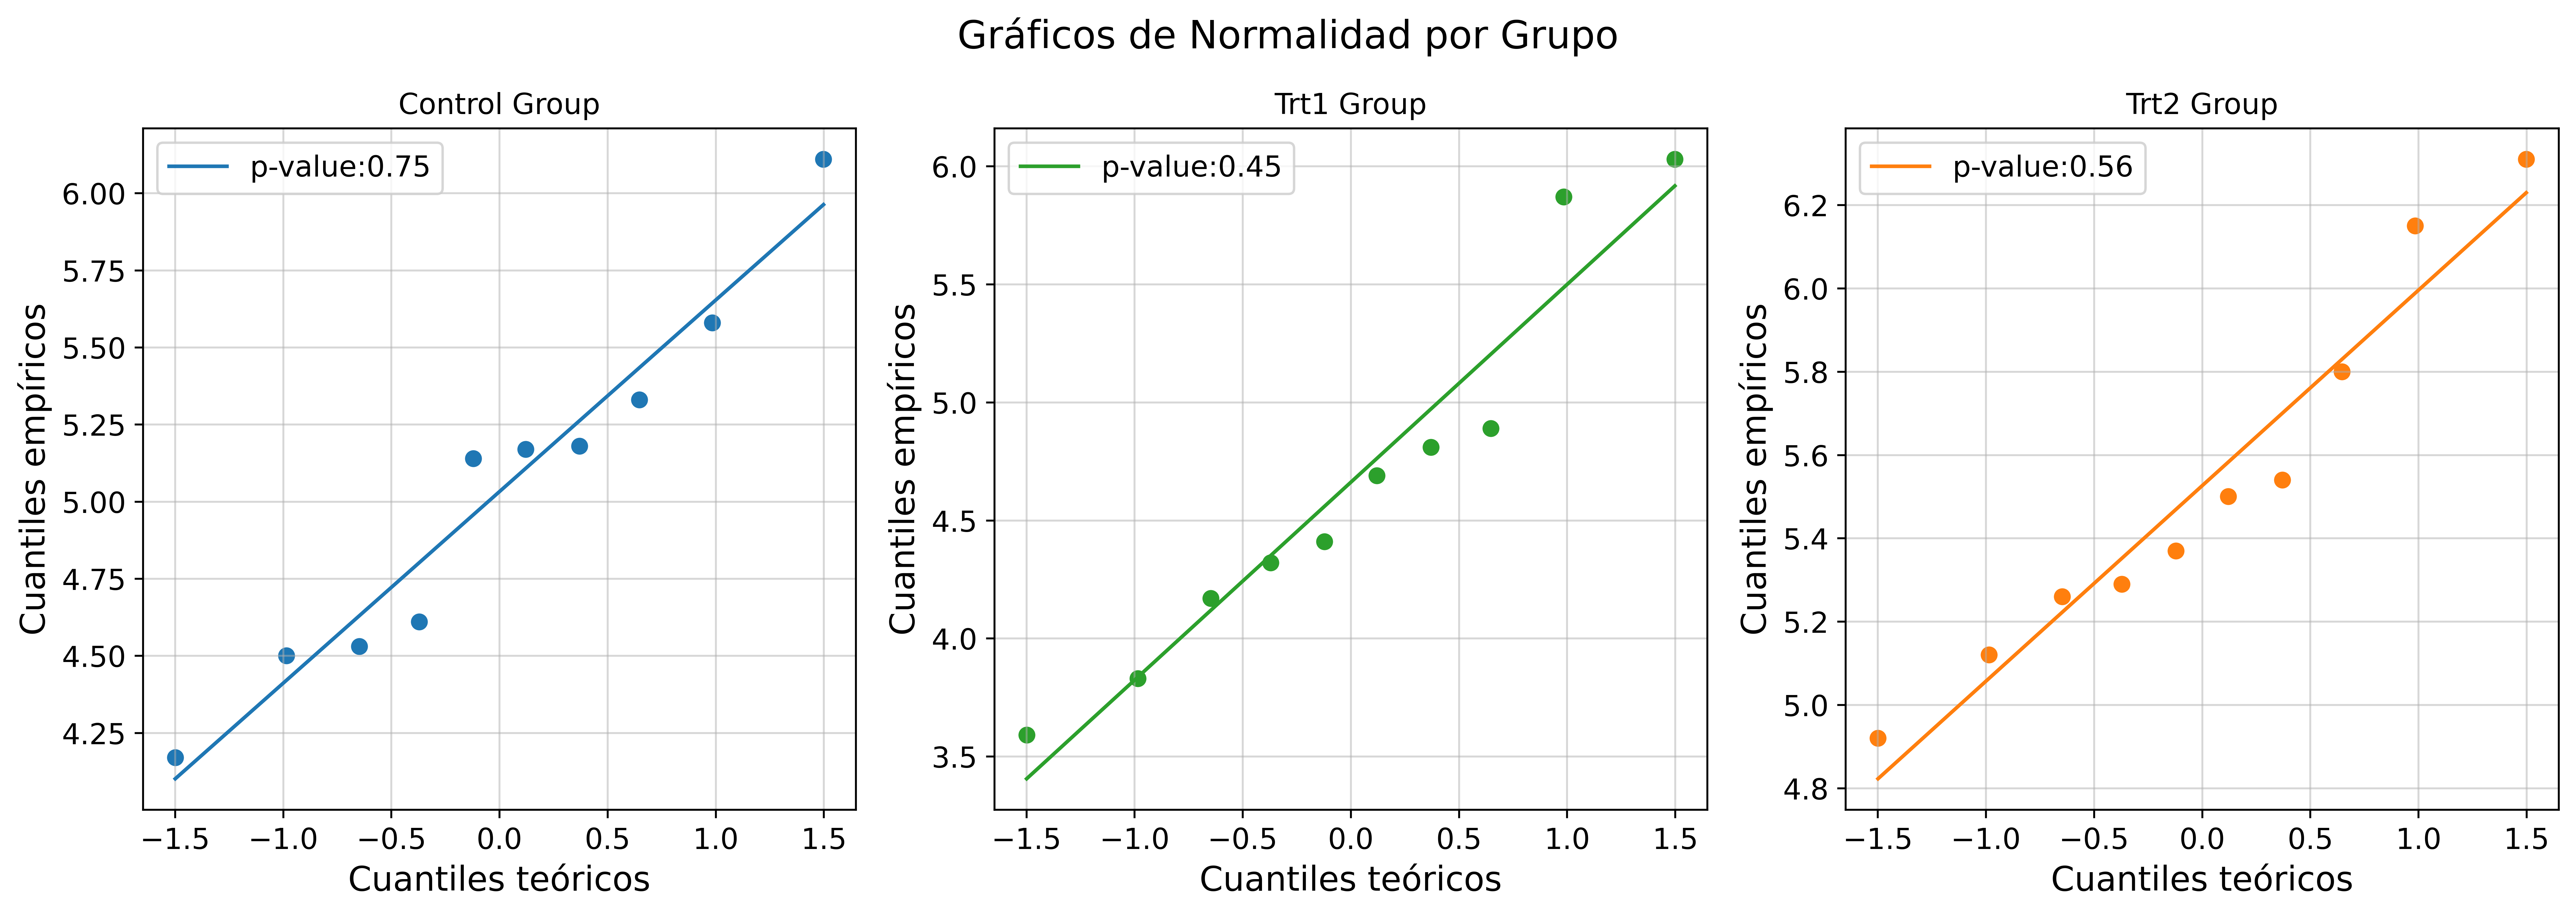

In [ ]:
# evaluamos normalidad de los datos
import matplotlib.pyplot as plt
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import scipy.stats as st
ctrl_group = dataset_plant.loc[dataset_plant['group'] == 'ctrl']['weight']
trt1_group = dataset_plant.loc[dataset_plant['group'] == 'trt1']['weight']
trt2_group = dataset_plant.loc[dataset_plant['group'] == 'trt2']['weight']

### Normality plots

fig, ax = plt.subplots(1, 3, dpi = 600, figsize = (15, 5))

### Grupo control
shapiro_wilk_control = st.shapiro(ctrl_group)

(osm, osr), (slope, intercept, r) = st.probplot(ctrl_group)
ax[0].set_title('Control Group')
ax[0].scatter(osm, osr)
ax[0].set_xlabel('Cuantiles teóricos')
ax[0].set_ylabel('Cuantiles empíricos')
ax[0].plot(osm, osm*slope + intercept, label = f'p-value:{shapiro_wilk_control.pvalue:.2f}')
ax[0].legend()
ax[0].grid(alpha = 0.5)
### Grupo Tr1

shapiro_wilk_tr1 = st.shapiro(trt1_group)

(osm, osr), (slope, intercept, r) = st.probplot(trt1_group)
ax[1].set_title('Trt1 Group')
ax[1].scatter(osm, osr, color = 'tab:green')
ax[1].set_xlabel('Cuantiles teóricos')
ax[1].set_ylabel('Cuantiles empíricos')
ax[1].plot(osm, osm*slope + intercept, label = f'p-value:{shapiro_wilk_tr1.pvalue:.2f}',
           color = 'tab:green')
ax[1].grid(alpha = 0.5)
ax[1].legend()

### Grupo tr2

shapiro_wilk_tr2 = st.shapiro(trt2_group)

(osm, osr), (slope, intercept, r) = st.probplot(trt2_group)
ax[2].set_title('Trt2 Group')
ax[2].scatter(osm, osr, color = 'tab:orange')
ax[2].set_xlabel('Cuantiles teóricos')
ax[2].set_ylabel('Cuantiles empíricos')
ax[2].plot(osm, osm*slope + intercept, label = f'p-value:{shapiro_wilk_tr2.pvalue:.2f}',
           color = 'tab:orange')
ax[2].grid(alpha = 0.5)
ax[2].legend()
fig.tight_layout()
fig.suptitle('Gráficos de Normalidad por Grupo', y = 1.05)
plt.show()






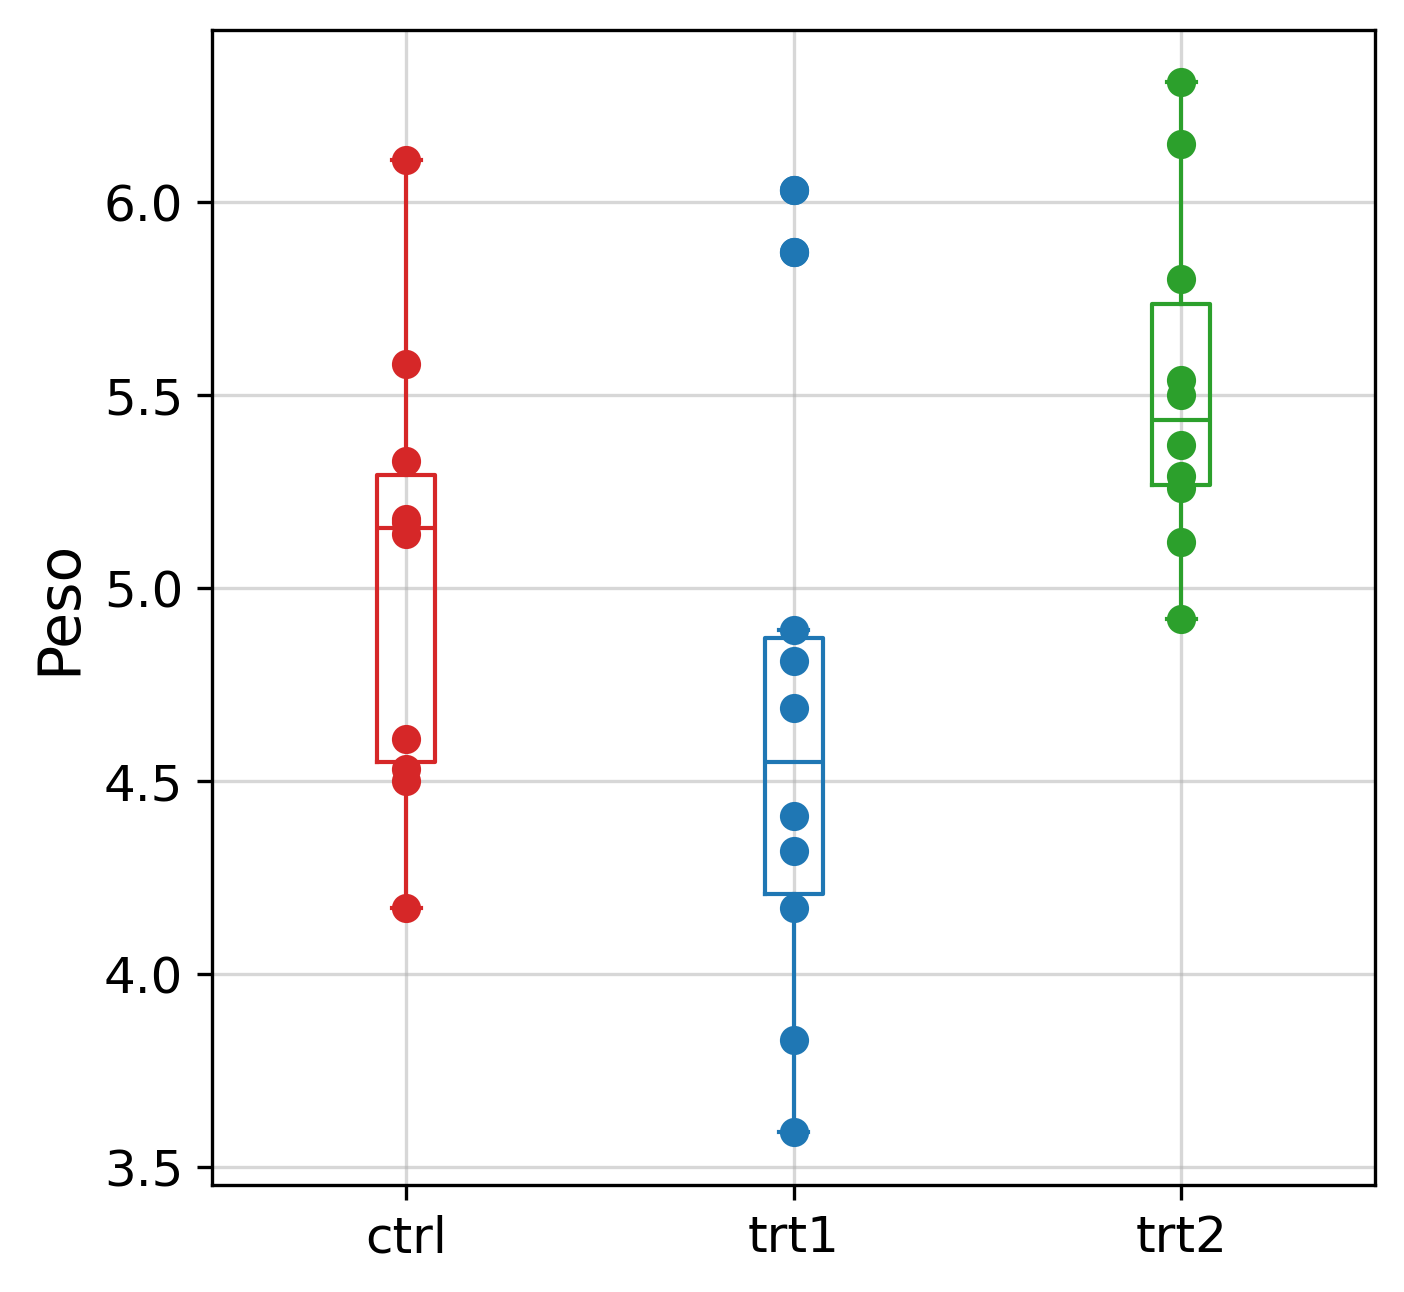

In [ ]:
# Análisis Exploratorio

fig, ax = plt.subplots(figsize = (5,5), dpi = 300)
ax.grid(alpha = 0.5, zorder = 1)
ax.boxplot(ctrl_group, positions = [1], tick_labels = ['ctrl'],
           boxprops=dict(color="tab:red"),
           medianprops=dict(color="tab:red"),
           capprops=dict(color="tab:red"),
           whiskerprops=dict(color="tab:red"),
           flierprops=dict(color="tab:red", markeredgecolor="tab:red"),
           zorder = 3)
ax.scatter([1]*len(ctrl_group), ctrl_group, color = 'tab:red', zorder = 3)
ax.boxplot(trt1_group, positions = [2], tick_labels = ['trt1'],
           boxprops=dict(color="tab:blue"),
           medianprops=dict(color="tab:blue"),
           capprops=dict(color="tab:blue"),
           whiskerprops=dict(color="tab:blue"),
           flierprops=dict(color="tab:blue", markeredgecolor="tab:blue"),
           zorder = 3)
ax.scatter([2]*len(trt1_group), trt1_group, color = 'tab:blue',zorder = 3)

ax.boxplot(trt2_group, positions = [3], tick_labels = ['trt2'],
           boxprops=dict(color="tab:green"),
           medianprops=dict(color="tab:green"),
           capprops=dict(color="tab:green"),
           whiskerprops=dict(color="tab:green"),
           flierprops=dict(color="tab:green", markeredgecolor="tab:green"),
           zorder = 3)
ax.scatter([3]*len(trt2_group), trt2_group, color = 'tab:green', zorder = 3)

ax.set_ylabel('Peso')


plt.show()

In [ ]:
### Levene test para homocedasticidad
levene_plant = st.levene(
    ctrl_group,
    trt1_group,
    trt2_group
)
print('Levene Test result:')
print(f'Statistic: {levene_plant.statistic:.4f}')
print(f'p-value: {levene_plant.pvalue:.4f}')

Levene Test result:
Statistic: 1.1192
p-value: 0.3412


In [ ]:
# Calculamos valores para la prueba estadistica F
import numpy as np
gran_promedio = np.mean(dataset_plant['weight']) # promedio de todos los datos
SST = sum((dataset_plant['weight'] - gran_promedio)**2) # Suma de Cuadrados Total
SSG = 0
for group in [ctrl_group, trt1_group, trt2_group]: # Iteramos los datos generados
    SSG += len(group) * (np.mean(group) - gran_promedio)**2 # Calculamos la suma de guadrados por grupo
SSR = SST - SSG # calculamos error cuadrado
print(f'Suma de Cuadrados Total (SST): {SST:.4f}')
print(f'Suma de Cuadrados por Grupo (SSG): {SSG:.4f}')
print(f'Suma de Cuadrados Error (SSE): {SSR:.4f}')

Suma de Cuadrados Total (SST): 14.2584
Suma de Cuadrados por Grupo (SSG): 3.7663
Suma de Cuadrados Error (SSE): 10.4921


In [ ]:

# Calculamos los grados de libertad y cuadrados medios
gl_total = len(dataset_plant['weight']) - 1
gl_grupo = dataset_plant['group'].nunique() - 1
gl_error = gl_total - gl_grupo
print(f'Grados de Libertad Total: {gl_total}')
print(f'Grados de Libertad Grupo: {gl_grupo}')
print(f'Grados de Libertad Error: {gl_error}')

Grados de Libertad Total: 29
Grados de Libertad Grupo: 2
Grados de Libertad Error: 27


In [ ]:
# Calculo de errores medios
MSG = SSG / gl_grupo
MSE = SSR / gl_error
print(f'Error Medio Grupo: {MSG:.4f}')
print(f'Error Medio Error: {MSE:.4f}')

Error Medio Grupo: 1.8832
Error Medio Error: 0.3886


In [ ]:
# Calculo de valor-F y probabilidad
F = MSG / MSE
p_value = 1 - st.f.cdf(F, gl_grupo, gl_error)

De esta forma con una prueba estadística F de 4.84 y p-value 0.015, rechazamos la hipótesis nula a un nivel de 5% de significacia. De esta forma, existe suficiente evidencia para decir que existe al menos un tratamiento que se diferencia en el peso promedio de plantas secas.

### Comentarios:
Para entender mejor el código, se tiene que:

```{p}
SSG = 0
for group in [ctrl_group, trt1_group, trt2_group]: # Iteramos los datos generados
    SSG += len(group) * (np.mean(group) - gran_promedio)**2
```
En este caso, el for loop itera sobre cada uno de los *dataframes* generados anteriormente. Por lo cual, en cada iteración, la variable `grupo` es uno de los *dataframes* antes mencionados. Luego, la variable `SSG` en cada iteración acumula la suma previa definida por la formula de la suma de cuadrados para cada grupo.

---
```{python}
p_value = 1 - st.f.cdf(F, gl_grupo, gl_error)
```
Este comando permite calcular el valor-p dado a que `st.f.cdf(F, gl_grupo, gl_error)` permite calcular:
$$
P(F\leq x| u_{\text{entre grupos}},v_{\text{dentro grupos}})
$$
Siguiendo una distribución F.

Es así que estamos calculando:
$$
1 - P(F\leq x) = P(F>x)
$$
Lo cual corresponde al valor-p para esta prueba.







### Implementación en Python

En `Python` es posible encontrar diferentes implementaciones del análisis ANOVA.
- [Scipy-OneWay ANOVA](https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.stats.f_oneway.html)
- [Statsmodels ANOVA](https://www.statsmodels.org/stable/anova.html)

El paquete más similar a R es `statsmodels` *(y el que será mostrado en este tutorial)*, pero ambos llegan a resultados equivalentes.
Podemos replicar el cálculo anterior utilizando este paquete de la siguiente forma:


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ols_plant = ols('weight ~ C(group)', dataset_plant).fit()
# la C(group) le indica a la funcion que group es una variable categórica
sm.stats.anova_lm(ols_plant, typ=2)

,sum_sq,df,F,PR(>F)
C(group),3.76634,2.0,4.846088,0.01591
Residual,10.49209,27.0,NaN,NaN


Donde la función `ols` genera un objeto de `ordinary least squares` que la función `sm.stats.anova_lm` interpreta para calcular los estadísticos de la prueba ANOVA.

## Caso de Estudio: InsectSprays


In [ ]:
import rdatasets # utilizamos este paquete para obtener datos desde R

dataset_spray = rdatasets.data('InsectSprays')

In [ ]:
dataset_spray['spray'].value_counts() # nos permite identificar la cantidad de datos por grupo

,count
spray,
A,12
B,12
C,12
D,12
E,12
F,12


p-values de test de Normalidad (Shapiro-Wilk)
Spray A: st.shapiro(Spray_A).pvalue = 0.7487
Spray B: st.shapiro(Spray_A).pvalue = 0.6415
Spray C: st.shapiro(Spray_A).pvalue = 0.0476
Spray D: st.shapiro(Spray_A).pvalue = 0.0027
Spray E: st.shapiro(Spray_A).pvalue = 0.2967
Spray F: st.shapiro(Spray_A).pvalue = 0.1009
p-values de test de Homocedasticidad (Levene)
p-value: st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F).pvalue = 0.0042


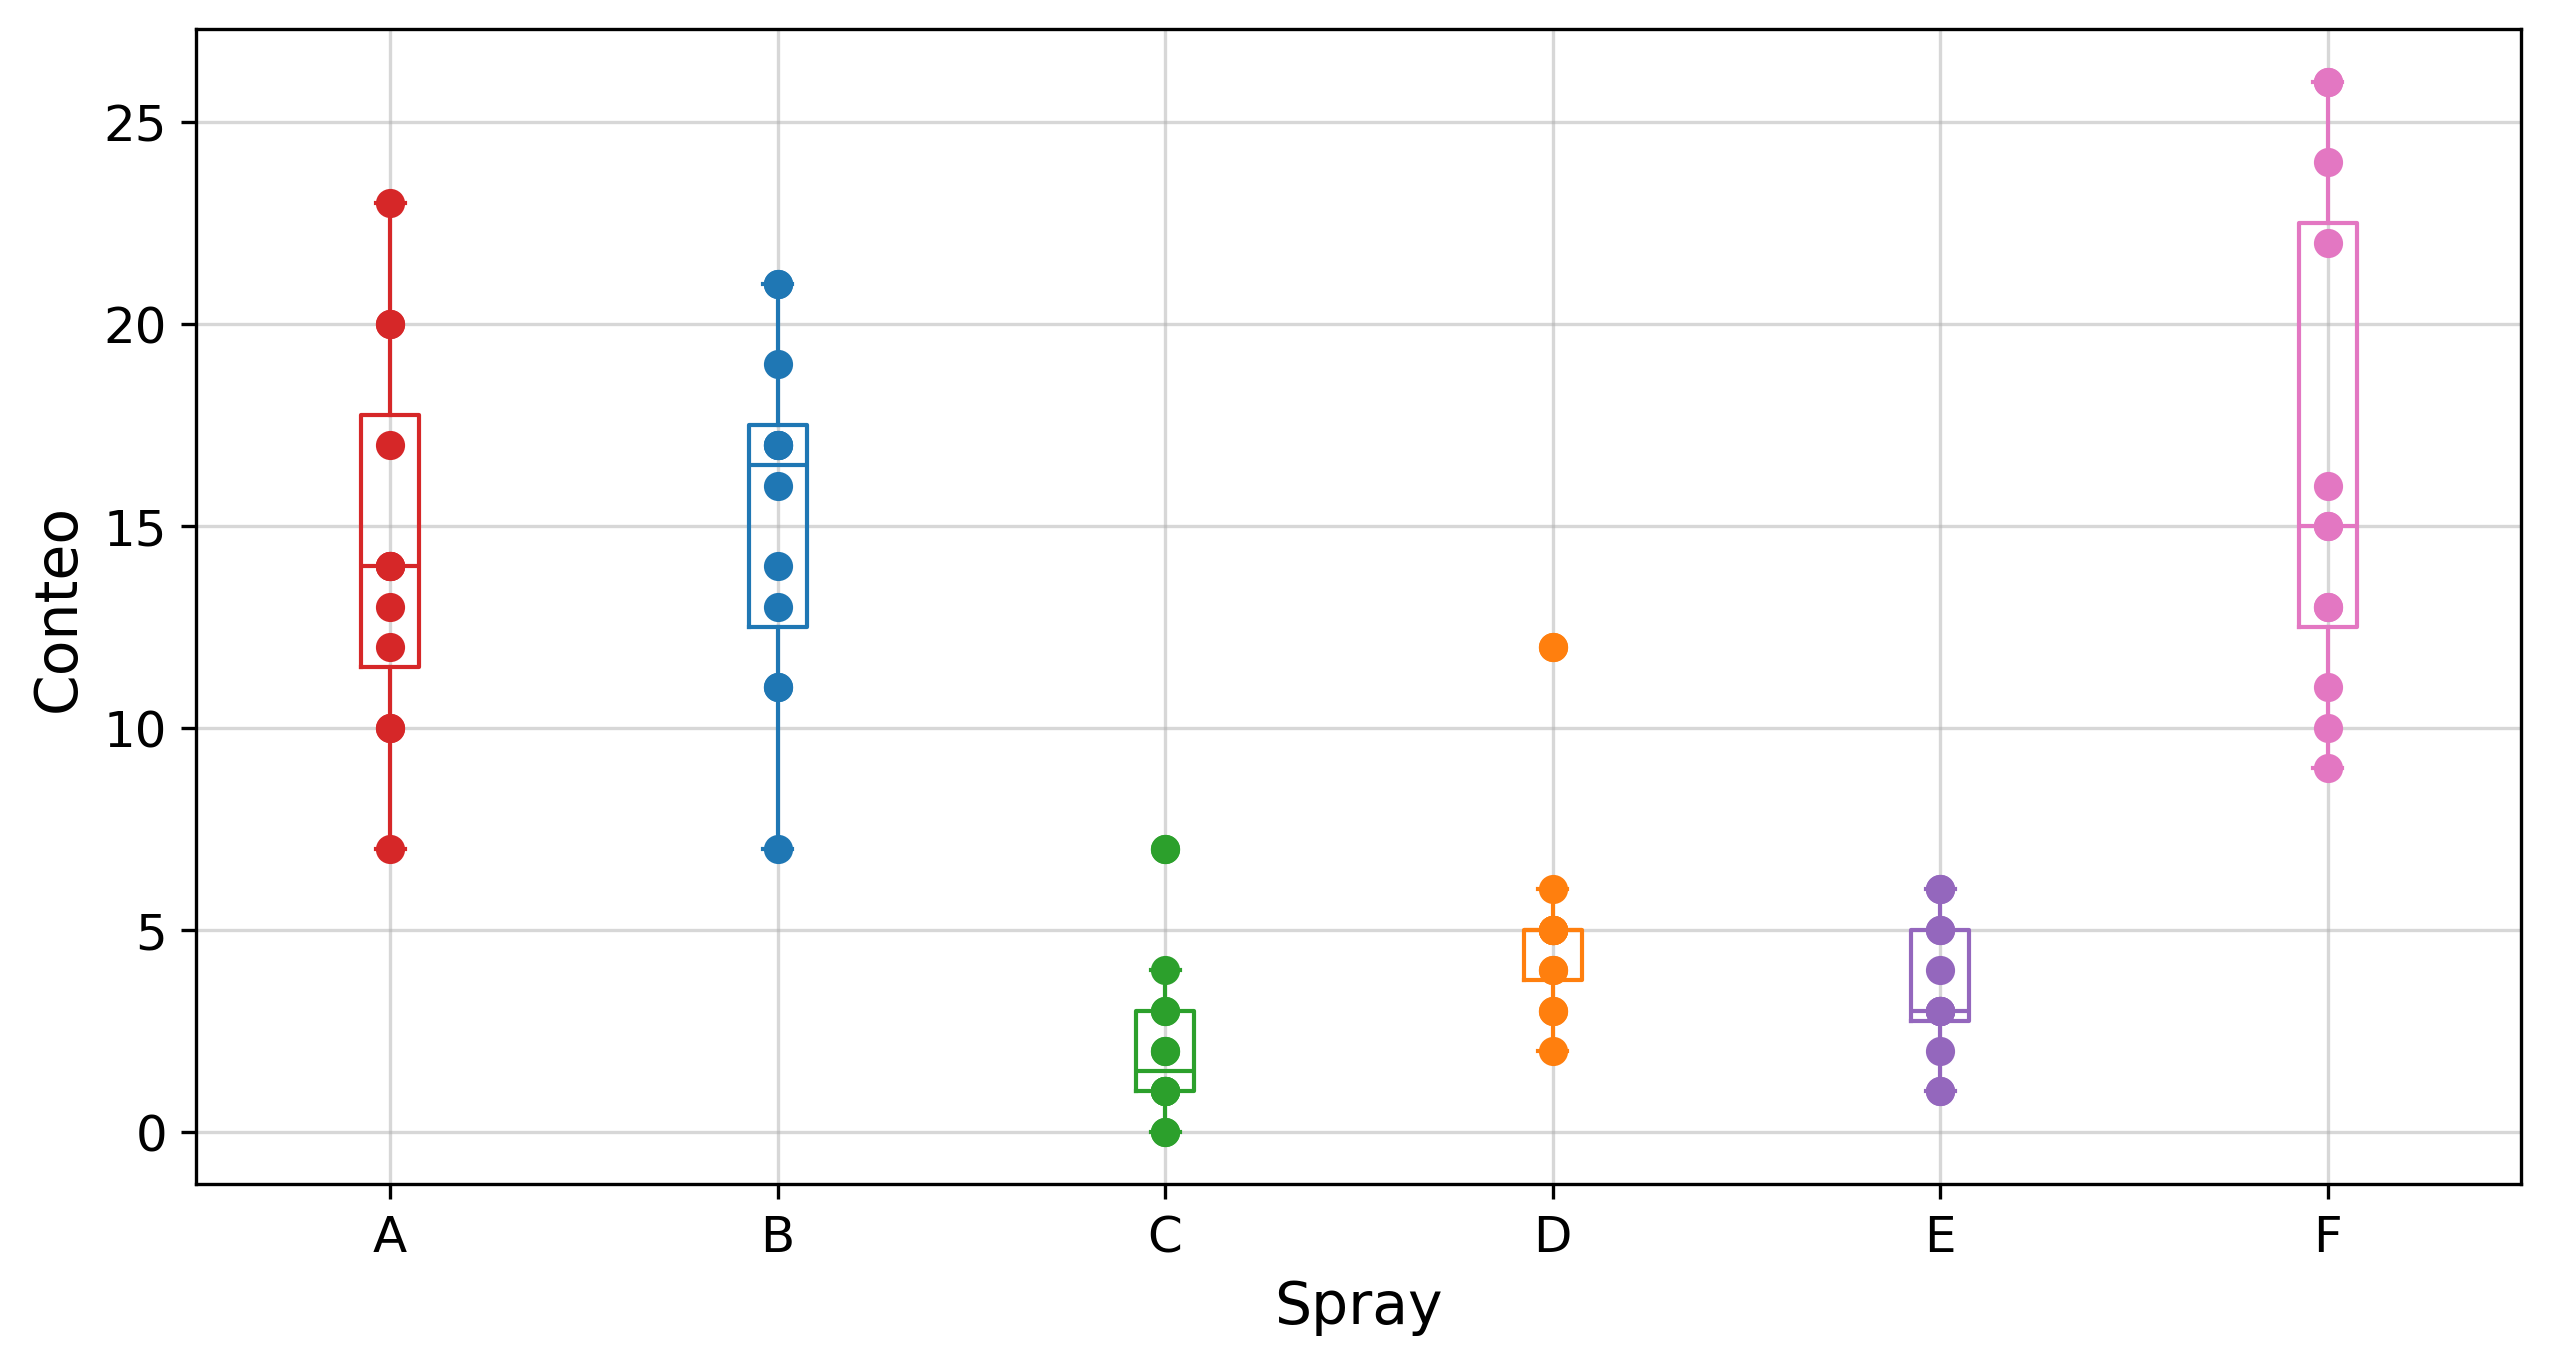

In [ ]:
Spray_A = dataset_spray.loc[dataset_spray['spray'] == 'A']['count']
Spray_B = dataset_spray.loc[dataset_spray['spray'] == 'B']['count']
Spray_C = dataset_spray.loc[dataset_spray['spray'] == 'C']['count']
Spray_D = dataset_spray.loc[dataset_spray['spray'] == 'D']['count']
Spray_E = dataset_spray.loc[dataset_spray['spray'] == 'E']['count']
Spray_F = dataset_spray.loc[dataset_spray['spray'] == 'F']['count']

# Test de Levene para homoscedasticidad
print("p-values de test de Normalidad (Shapiro-Wilk)")
print(f'Spray A: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_A).pvalue:.4f}')
print(f'Spray B: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_B).pvalue:.4f}')
print(f'Spray C: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_C).pvalue:.4f}')
print(f'Spray D: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_D).pvalue:.4f}')
print(f'Spray E: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_E).pvalue:.4f}')
print(f'Spray F: st.shapiro(Spray_A).pvalue = {st.shapiro(Spray_F).pvalue:.4f}')
print("p-values de test de Homocedasticidad (Levene)")

levene = st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F)
print(f'p-value: st.levene(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F).pvalue = {levene.pvalue:.4f}')

# Analisis exploratorio
fig, ax = plt.subplots(figsize = (10,5), dpi = 300)
ax.boxplot(Spray_A, positions = [1], tick_labels = ['A'],
           boxprops=dict(color="tab:red"),
           medianprops=dict(color="tab:red"),
           capprops=dict(color="tab:red"),
           whiskerprops=dict(color="tab:red"),
           flierprops=dict(color="tab:red", markeredgecolor="tab:red"),
           zorder = 3
           )
ax.scatter([1]*len(Spray_A), Spray_A, color = 'tab:red', zorder = 3)
ax.boxplot(Spray_B, positions = [2], tick_labels = ['B'],
           boxprops=dict(color="tab:blue"),
           medianprops=dict(color="tab:blue"),
           capprops=dict(color="tab:blue"),
           whiskerprops=dict(color="tab:blue"),
           flierprops=dict(color="tab:blue", markeredgecolor="tab:blue"),
           zorder = 3)
ax.scatter([2]*len(Spray_B), Spray_B, color = 'tab:blue', zorder = 3)
ax.boxplot(Spray_C, positions = [3], tick_labels = ['C'],
           boxprops=dict(color="tab:green"),
           medianprops=dict(color="tab:green"),
           capprops=dict(color="tab:green"),
           whiskerprops=dict(color="tab:green"),
           flierprops=dict(color="tab:green", markeredgecolor="tab:green"),
           zorder = 3)
ax.scatter([3]*len(Spray_C), Spray_C, color = 'tab:green', zorder = 3)

ax.boxplot(Spray_D, positions = [4], tick_labels = ['D'],
           boxprops=dict(color="tab:orange"),
           medianprops=dict(color="tab:orange"),
           capprops=dict(color="tab:orange"),
           whiskerprops=dict(color="tab:orange"),
           flierprops=dict(color="tab:orange", markeredgecolor="tab:orange"),
           zorder = 3)
ax.scatter([4]*len(Spray_D), Spray_D, color = 'tab:orange', zorder = 3)

ax.boxplot(Spray_E, positions = [5], tick_labels = ['E'],
           boxprops=dict(color="tab:purple"),
           medianprops=dict(color="tab:purple"),
           capprops=dict(color="tab:purple"),
           whiskerprops=dict(color="tab:purple"),
           flierprops=dict(color="tab:purple", markeredgecolor="tab:purple"),
           zorder = 3)
ax.scatter([5]*len(Spray_E), Spray_E, color = 'tab:purple', zorder = 3)

ax.boxplot(Spray_F, positions = [6], tick_labels = ['F'],
           boxprops=dict(color="tab:pink"),
           medianprops=dict(color="tab:pink"),
           capprops=dict(color="tab:pink"),
           whiskerprops=dict(color="tab:pink"),
           flierprops=dict(color="tab:pink", markeredgecolor="tab:pink"),
           zorder = 3)

ax.scatter([6]*len(Spray_F), Spray_F, color = 'tab:pink', zorder = 3)

ax.grid(alpha = 0.5, zorder = 1)
ax.set_ylabel('Conteo')
ax.set_xlabel('Spray')
plt.show()

En el caso del Spray C y D, tenemos distribuciones casi normal y no-normal, respectivamente. Por lo cual no se cumple la condición de asimetría. Pero el test de ANOVA es usualmente robusto a estas situaciones, por lo cual es posible continuar reportando este caso. A su vez, es posible utilizar tests no paramétricos como el test de **Kruskal-Wallis**.

In [ ]:
# Comparación utilizando la prueba ANOVA
ols_spray = ols('count ~ C(spray)', data = dataset_spray).fit()
sm.stats.anova_lm(ols_spray, typ=2)

,sum_sq,df,F,PR(>F)
C(spray),2668.833333,5.0,34.702282,3.182584e-17
Residual,1015.166667,66.0,NaN,NaN


In [ ]:
# Comparación utilizando el test Kruskal-Wallis
kruskal_spray = st.kruskal(Spray_A, Spray_B, Spray_C, Spray_D, Spray_E, Spray_F)
print('Kruskal-Wallis Test result:')
print(f'Statistic: {kruskal_spray.statistic:.4f}')
print(f'p-value: {kruskal_spray.pvalue:.4e}')

Kruskal-Wallis Test result:
Statistic: 54.6913
p-value: 1.5108e-10


De esta forma con una prueba estadística F de 34.7 y p-value <<0.05 , rechazamos la hipótesis nula a un nivel de 5% de significacia. De esta forma, existe suficiente evidencia para decir que existe al menos un insecticida que se diferencia en promedio del resto en su capacidad de eliminar insectos.